# Credit EDA Case Study

### Data Overview
This notebook uses two datasets:-

- `'application_data.csv'` contains all the information of the client at the time of application.It contains two types of scenarios.
    1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample.
    2. All other cases: All other cases when the payment is paid on time.
    

- `'previous_application.csv'` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer

## Data Sourcing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import application_data.csv

#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

pd.set_option('display.max_columns',999) #set column display number
pd.set_option('display.max_rows',200) #set row display number
pd.set_option('float_format', '{:f}'.format) #set float format
 
#Importing the data
df_app = pd.read_csv('application_data.csv')

## Checking Data Structure

In [4]:
# Starting with analysis of Application data

# Shape: Displays number of column and rows
print('Shape:',df_app.shape,'\n')

#info: Displays number of rows for each column and its datatype
print(df_app.info())

#Columns display
print(df_app.columns)

Shape: (307511, 122) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [5]:
#Statistical description of each column in application_data.csv
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,0.514393,0.510853,0.117440,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.08795

In [6]:
#Display top 5 row
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,NaN,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

## Data Quality Check and Missing values

**Calculate percentage of missing values of all columns**

In [7]:
round(100*(df_app.isnull().sum()/len(df_app.index)),2)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090000
NAME_TYPE_SUITE                 0.420000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

__Dropping the columns with missing values >= 50%__

In [55]:
#Assigning NULL percentage value to df_null
df_null = round(100*(df_app.isnull().sum()/len(df_app.index)),2)

# find columns with more than 30% missing values
column = df_null[df_null >= 30].index 

# drop columns with high null percentage
df_app.drop(column,axis = 1,inplace = True)

#check null percentage after dropping
round(100*(df_app.isnull().sum()/len(df_app.index)),2)

SK_ID_CURR            0.000000
TARGET                0.000000
NAME_CONTRACT_TYPE    0.000000
CODE_GENDER           0.000000
FLAG_OWN_CAR          0.000000
FLAG_OWN_REALTY       0.000000
CNT_CHILDREN          0.000000
AMT_INCOME_TOTAL      0.000000
AMT_CREDIT            0.000000
AMT_ANNUITY           0.000000
AMT_GOODS_PRICE       0.090000
NAME_TYPE_SUITE       0.420000
NAME_INCOME_TYPE      0.000000
NAME_EDUCATION_TYPE   0.000000
NAME_FAMILY_STATUS    0.000000
NAME_HOUSING_TYPE     0.000000
AGE                   0.000000
YEARS_WRK_EXP         0.000000
CNT_FAM_MEMBERS       0.000000
ORGANIZATION_TYPE     0.000000
dtype: float64

### Metrics to Impute missing values

#### Analysis for imputing

In [56]:
# Check the statistical distribution of data.
print(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
print(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].describe())
print(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())
print(df_app['AMT_REQ_CREDIT_BUREAU_MON'].describe())
print(df_app['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
print(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

KeyError: 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [57]:
#Check the mode
print(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
print(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print(df_app['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print(df_app['AMT_REQ_CREDIT_BUREAU_QRT'].mode())
print(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())

KeyError: 'AMT_REQ_CREDIT_BUREAU_HOUR'

#### 1. AMT_REQ_CREDIT_BUREAU (HOUR, DAY, WEEK, MON, QRT, YEAR) = 13.50%

Considering the data in the column, we can assume that data to be categorical. We can categorise loan application where AMT_REQ_CREDIT_BUREAU_HOUR is [0-4],AMT_REQ_CREDIT_BUREAU_DAY is [0-9], AMT_REQ_CREDIT_BUREAU_WEEK is [0-8], AMT_REQ_CREDIT_BUREAU_MON is [0-27], AMT_REQ_CREDIT_BUREAU_QRT is [0-261] and AMT_REQ_CREDIT_BUREAU_YEAR is [0-25].

__Inference__ : If we see categorywise, maximum(more than 85%) applicants have '0'. Hence , we can impute null values with __mode__ value for columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR

**Impute code :**

`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_HOUR']),'AMT_REQ_CREDIT_BUREAU_HOUR'] = 0`
`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_DAY']),'AMT_REQ_CREDIT_BUREAU_DAY'] = 0`
`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_WEEK']),'AMT_REQ_CREDIT_BUREAU_WEEK'] = 0`
`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_MON']),'AMT_REQ_CREDIT_BUREAU_MON'] = 0`
`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_QRT']),'AMT_REQ_CREDIT_BUREAU_QRT'] = 0`
`df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_YEAR']),'AMT_REQ_CREDIT_BUREAU_YEAR'] = 0`

**check if null values are imputed :**

`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_HOUR']))`
`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_DAY']))`
`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_WEEK']))`
`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_MON']))`
`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_QRT']))`
`sum(pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_YEAR']))`

#### 2. NAME_TYPE_SUITE (Categorical) = 0.42%

**Inference** : There are only two possibilities 
                1. client is accompanied with somebody
                2. came alone (Unaccompained)
Hence whereever this field is blank,we will fill it with "Unaccompanied" categorical value

**Impute code :**

`df_app.loc[pd.isnull(df_app['NAME_TYPE_SUITE']),'NAME_TYPE_SUITE'] = "Unaccompanied"`

**check if null values are imputed :**

`sum(pd.isnull(df_app['NAME_TYPE_SUITE']))`

#### 3. OCCUPATION_TYPE(Categorical) = 31.35%
**Assumption:** If we assume that Occupation type which is not listed in the application form are kept blank, we can impute null values with categorical value "Others"

**Impute code :**

`df_app.loc[pd.isnull(df_app['OCCUPATION_TYPE']),'OCCUPATION_TYPE'] = "Others"`

**check if null values are imputed :**

`sum(pd.isnull(df_app['OCCUPATION_TYPE']))`

#### 4. AMT_GOODS_PRICE (Numerical) = 0.09%

**Inference** : If we analyse application data file for NAME_CONTRACT_TYPE = Revolving loans, for all the entries where data is available, AMT_CREDIT is equal to AMT_GOODS_PRICE. The rows for which AMT_GOODS_PRICE is null/blank are for NAME_CONTRACT_TYPE = Revolving loans. Hence, will impute data for missing values for AMT_GOODS_PRICE with respective row's of AMT_CREDIT value.  

**Impute code :**

`df_app.loc[pd.isnull(df_app['AMT_GOODS_PRICE']),'AMT_GOODS_PRICE'] = df_app['AMT_CREDIT']`

**check if null values are imputed :**

`sum(pd.isnull(df_app['AMT_GOODS_PRICE']))`


#### 5. OBS_30_CNT_SOCIAL_CIRCLE = 0.33%

**Inference** : If we see categorywise, maximum applicants have OBS_30_CNT_SOCIAL_CIRCLE = 0, hence , we will impute null values with mode value for column OBS_30_CNT_SOCIAL_CIRCLE 

**Impute code :**

`df_app.loc[pd.isnull(df_app['OBS_30_CNT_SOCIAL_CIRCLE']),'OBS_30_CNT_SOCIAL_CIRCLE'] = 0`

**check if null values are imputed**

`sum(pd.isnull(df_app['OBS_30_CNT_SOCIAL_CIRCLE']))`

### Datatype check for all columns

In [58]:
df_app.dtypes

SK_ID_CURR              object
TARGET                  object
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                      int32
YEARS_WRK_EXP            int32
CNT_FAM_MEMBERS          int32
ORGANIZATION_TYPE       object
dtype: object

In [59]:
#Checking negative values of Days
print(df_app[df_app['DAYS_BIRTH']<0].DAYS_BIRTH)
print(df_app[df_app['DAYS_EMPLOYED']<0].DAYS_EMPLOYED)
print(df_app[df_app['DAYS_REGISTRATION']<0].DAYS_REGISTRATION)
print(df_app[df_app['DAYS_ID_PUBLISH']<0].DAYS_ID_PUBLISH)

KeyError: 'DAYS_BIRTH'

In [60]:
#Converting negative vaules of Days to positive using abs()

df_app['DAYS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].abs()
df_app['DAYS_BIRTH'] = df_app['DAYS_BIRTH'].abs()
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].abs()
df_app['DAYS_ID_PUBLISH'] = df_app['DAYS_ID_PUBLISH'].abs()

KeyError: 'DAYS_EMPLOYED'

In [61]:
#Checking if covertion worked
print(df_app[df_app['DAYS_BIRTH']<0].DAYS_EMPLOYED)
print(df_app[df_app['DAYS_EMPLOYED']<0].DAYS_EMPLOYED)
print(df_app[df_app['DAYS_REGISTRATION']<0].DAYS_EMPLOYED)
print(df_app[df_app['DAYS_ID_PUBLISH']<0].DAYS_EMPLOYED)

KeyError: 'DAYS_BIRTH'

In [62]:
#select only identified columns from dataset
Col_dtype = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']
df_app[Col_dtype].dtypes

KeyError: "['DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'DAYS_BIRTH'] not in index"

In [63]:
#SK_ID_CURR is application ID so it can be converted to String/object
df_app['SK_ID_CURR'] = df_app['SK_ID_CURR'].astype('str')

In [64]:
#TARGET is column on which we are dividing our datasets for analysis,hence we are converting it to the string
df_app['TARGET'] = df_app['TARGET'].astype('str')
df_app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [65]:
df_app['CNT_FAM_MEMBERS'].isnull().sum()

0

In [66]:
# imputing null values with mode for CNT_FAM_MEMBERS, as we need this column in further analysis
# Note there are only 2 null value, so it will not make any difference if we impute it with mode value which is 2.0 
print('Mode:',df_app['CNT_FAM_MEMBERS'].mode())
df_app.loc[pd.isnull(df_app['CNT_FAM_MEMBERS']),'CNT_FAM_MEMBERS'] = 2.0

# change it to int datatype as its a number of family members and its should be in integer.
df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype('int')
df_app['CNT_FAM_MEMBERS'].value_counts()

Mode: 0    2
dtype: int32


2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
12         2
14         2
16         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

### Outliers Graph

For outliers check, we will check by plotting the box plot of respective columns. 

1. AGE (DAYS_BIRTH)
2. YEARS_WRK_EXP (DAYS_EMPLOYED)
3. AMT_INCOME_TOTAL
4. AMT_CREDIT
5. AMT_ANNUITY
6. AMT_GOODS_PRICE

In [67]:
#Converting the days to year for DAYS_BIRTH would held AGE of a person
df_app['DAYS_BIRTH'] = abs((df_app['DAYS_BIRTH']/365)).astype(int)
#Converting the days to year for DAYS_EMPLOYED would held YEAR_WRK_EXP
df_app['DAYS_EMPLOYED'] = abs((df_app['DAYS_EMPLOYED']/365)).astype(int)

#Renaming the columns
df_app.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_WRK_EXP'},inplace = True)

KeyError: 'DAYS_BIRTH'

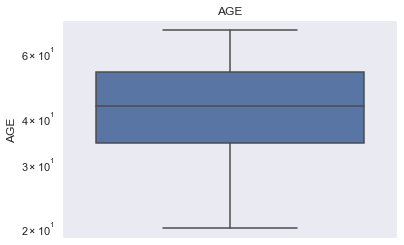

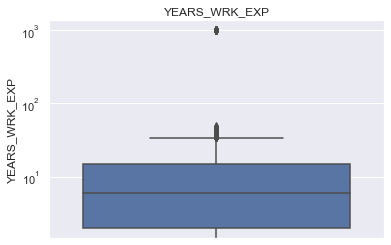

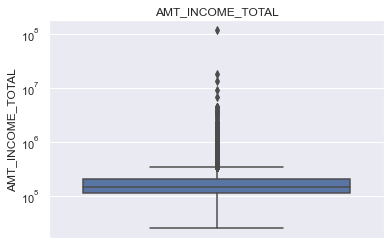

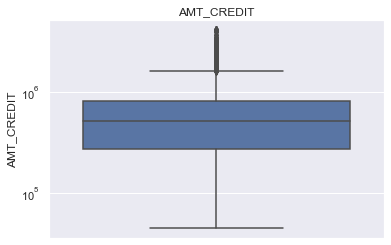

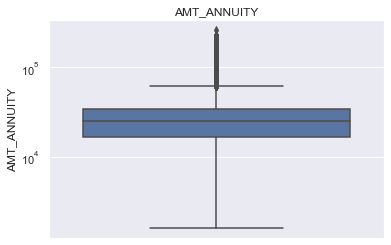

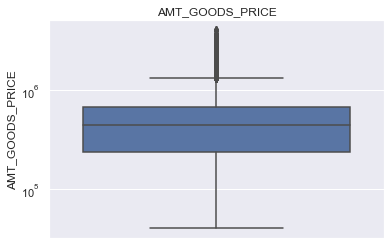

In [68]:
#Creating list of varibales
l1 = ['AGE','YEARS_WRK_EXP','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
#plotting box plot for analysing the outliers
for i in l1:
    plt.yscale('log')
    sns.boxplot(y=df_app[i])
    plt.title(i)
    plt.show()

### Remarks and Treatment Process

1. **AGE**: There are no outliers present in the column. So no need for further treatment.

2. **Others** ['YEARS_WRK_EXP','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'] : we can observer outliers lie on the higher quantile. To treat the outlier we can Perform IQR method.

    **Steps to Remove Outliers**
    -  calculate the IQR value
    -  Find the Outlier value by multiplying the IQR value by 1.5 and adding to higher quantile.
    -  Values above the outlier value is treated as outlier and can be removed.


Ex: **YEARS_WRK_EXP**
#### Calulate IQR
`IQR1=(df_app.YEARS_WRK_EXP.quantile(0.75)-df_app.YEARS_WRK_EXP.quantile(0.25))`
#### Multiply by 1.5 and add higher quantile
`outlier1=(1.5 * IQR1) + df_app.YEARS_WRK_EXP.quantile(0.75)`
#### Remove the values above the calculated outlier.
`df_app=df_app[df_app.YEARS_WRK_EXP < outlier1]`
#### Plot the graph after treatment
`plt.yscale('log')
sns.boxplot(y=df_app['YEARS_WRK_EXP'])
plt.title("YEARS_WRK_EXP")
plt.show()`


### Binning of Continous variable

##### Columns selected are as below :
1. AMT_CREDIT              
2. AGE

In [69]:
#1. AMT_CREDIT

#Categorise the applicants into four groups based on the AMT_CREDIT value 
#Low,Average, Good, Best. Where Best would have the highest AMT_CREDIT and low would have lowest AMT_CREDIT value.

#Function to bin, depending on the values 
def category(x) : 
    if x <= 250000 :
        return 'Low'
    if (x > 250000) & (x <= 500000) :
        return 'Average'
    if (x > 500000) & (x <= 800000) :
        return 'Good'
    if x > 800000 :
        return 'Best'
# Categorise based on categories above
df_app['Bin_AMT_CREDIT'] = df_app['AMT_CREDIT'].apply(category)
df_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Bin_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,1,Business Entity Type 3,Average
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,2,School,Best
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,1,Government,Low
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,2,Business Entity Type 3,Average
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,1,Religion,Good


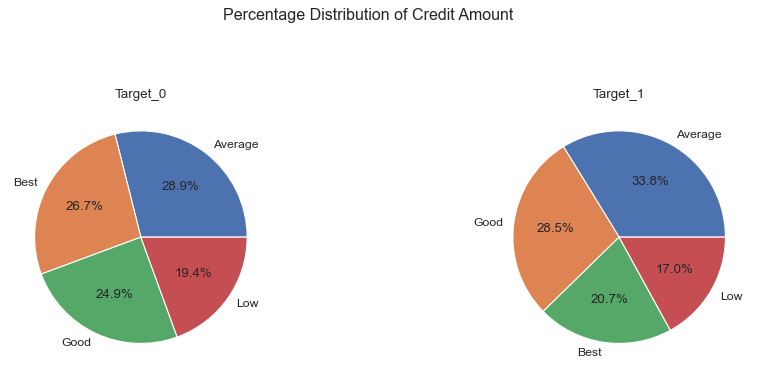

In [70]:
#Plotting the BIN_AMT_CREDIT w.r.t Target variable

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.0, wspace=0.8)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
df_app[df_app['TARGET']== '0'].Bin_AMT_CREDIT.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
df_app[df_app['TARGET']== '1'].Bin_AMT_CREDIT.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Credit Amount")
plt.show()

1.There is no huge difference in % distribution of AMT_CREDIT over applicant having payment difficulties or not.<br>
2.However, highest number of applicants having payment difficulties belong to Average category ((Amt_credit > 500000) & (Amt_credit <= 800000)

In [71]:
#2. AGE
#Categorise the applicants into four groups based on the AGE value (20s, 30s, 40s, 50s, Senior_Citizen). 

#Funstion to Bin 
def age(x) :
    if x <= 29 :
        return '20s'
    if x<= 39 :
        return '30s'
    if x<= 49 :
        return '40s'
    if x<= 59 :
        return '50s'
    if x>= 60 :
        return 'Senior_Citizen'
# Categorise based on categories above
df_app['Bin_AGE'] = df_app['AGE'].apply(age)
df_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Bin_AMT_CREDIT,Bin_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,1,Business Entity Type 3,Average,20s
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,2,School,Best,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,1,Government,Low,50s
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,2,Business Entity Type 3,Average,50s
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,1,Religion,Good,50s


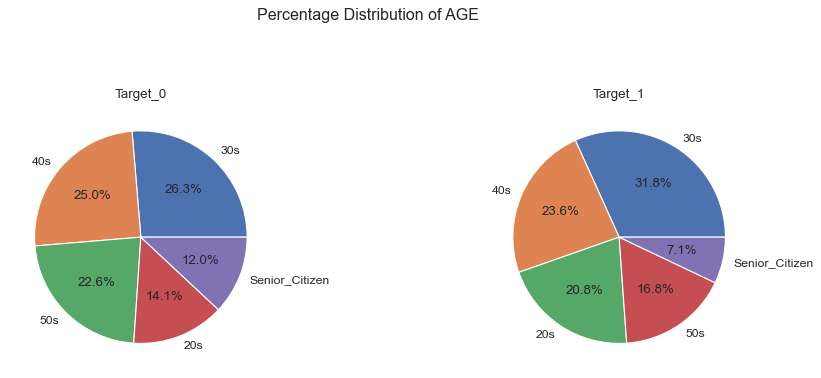

In [72]:
#Plotting the BIN_AGE w.r.t Target variable

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.0, wspace=0.8)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
df_app[df_app['TARGET']== '0'].Bin_AGE.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
df_app[df_app['TARGET']== '1'].Bin_AGE.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of AGE")
plt.show()

1. Applicants with age group 20s,30s,40s are more likely to default,contributing nearly 80% of total defaulters.<br>
2. Senior_Citizen are less likely to default.<br>
2. 31.8% of applicants in 30's are more likely to have payment difficulties.

Taking **relevant columns** from application data for further analysis

In [73]:
#selecting only relevent columns from dataset for further analysis

df_app = df_app[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE',
'YEARS_WRK_EXP','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']]


KeyError: "['OCCUPATION_TYPE'] not in index"

In [74]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Bin_AMT_CREDIT,Bin_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,1,Business Entity Type 3,Average,20s
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,2,School,Best,40s
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,1,Government,Low,50s
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,2,Business Entity Type 3,Average,50s
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,1,Religion,Good,50s


In [75]:
df_app.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,43.435968,185.021521,2.152664
std,0.722121,237123.146279,402490.776996,14493.737315,369446.460540,11.954593,381.972190,0.910679
min,0.000000,25650.000000,45000.000000,1615.500000,40500.000000,20.000000,0.000000,1.000000
25%,0.000000,112500.000000,270000.000000,16524.000000,238500.000000,34.000000,2.000000,2.000000
50%,0.000000,147150.000000,513531.000000,24903.000000,450000.000000,43.000000,6.000000,2.000000
75%,1.000000,202500.000000,808650.000000,34596.000000,679500.000000,53.000000,15.000000,3.000000
max,19.000000,117000000.000000,4050000.000000,258025.500000,4050000.000000,69.000000,1000.000000,20.000000


### Imbalance Percentage

In [76]:
#Calculating the imbalance percentage of the TARGET column
round((df_app.TARGET[df_app['TARGET']=='1'].count()) / (df_app.TARGET[df_app['TARGET']=='0'].count()) * 100,2)

8.78

Imbalance percentage of the Target column = **8.78 %**

In [77]:
df_app.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [78]:
#let's divide the dataframe into two sets i.e. Target=1 and Target=0

df_target1=df_app[df_app['TARGET']=='1']

df_target0=df_app[df_app['TARGET']=='0']

### CORRELATION MATRIX

### Target1

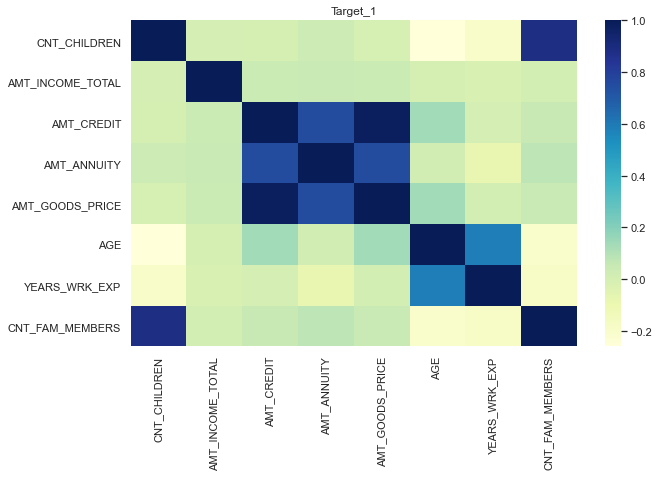

In [79]:
# Graphical representation for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_target1.corr(),cmap="YlGnBu")
plt.title("Target_1")
plt.show()

In [87]:
#Get top 10 correlated variables for Target1 dataframe
df_target1.corr().unstack().reset_index()
corr1 = df_target1.corr()
corr1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
corr1 = corr1.unstack().reset_index()
corr1.columns = ['Feature 1','Feature 2','Abs Pearson Correlation']
corr1.dropna(subset=['Abs Pearson Correlation'],inplace=True)
corr1['Abs Pearson Correlation'] = abs(corr1['Abs Pearson Correlation'])
corr1.sort_values(by = 'Abs Pearson Correlation',ascending=False).head(10)

,Feature 1,Feature 2,Abs Pearson Correlation
34,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
56,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
26,AMT_ANNUITY,AMT_CREDIT,0.752195
53,YEARS_WRK_EXP,AGE,0.582443
40,AGE,CNT_CHILDREN,0.259222
61,CNT_FAM_MEMBERS,AGE,0.203403
48,YEARS_WRK_EXP,CNT_CHILDREN,0.192866
62,CNT_FAM_MEMBERS,YEARS_WRK_EXP,0.186516
44,AGE,AMT_GOODS_PRICE,0.135603


### Target 0

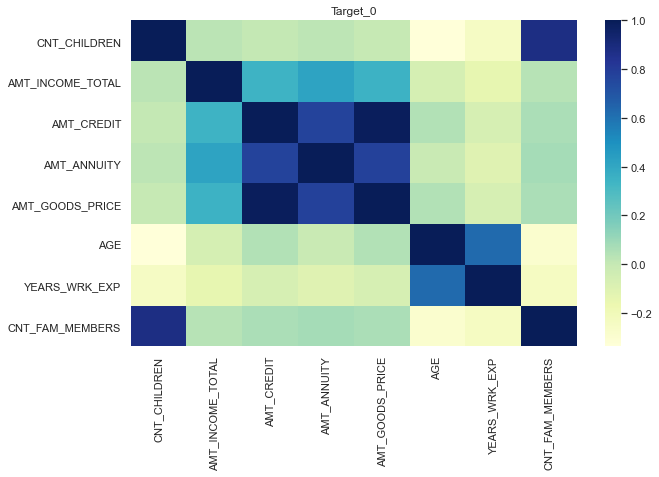

In [81]:
# Graphical representation for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_target0.corr(),cmap="YlGnBu")
plt.title("Target_0")
plt.show()

In [88]:
#Get top 10 correlated variables for Target0 dataframe
df_target0.corr().unstack().reset_index()
corr0 = df_target0.corr()
corr0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))
corr0 = corr0.unstack().reset_index()
corr0.columns = ['Feature 1','Feature 2','Abs Pearson Correlation']
corr0.dropna(subset=['Abs Pearson Correlation'],inplace=True)
corr0['Abs Pearson Correlation'] = abs(corr0['Abs Pearson Correlation'])
corr0.sort_values(by = 'Abs Pearson Correlation',ascending=False).head(10)

,Feature 1,Feature 2,Abs Pearson Correlation
34,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
56,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
26,AMT_ANNUITY,AMT_CREDIT,0.771309
53,YEARS_WRK_EXP,AGE,0.626028
25,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
33,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
17,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
40,AGE,CNT_CHILDREN,0.336907
61,CNT_FAM_MEMBERS,AGE,0.285804


From the above two tables, we can infer that:

- For both the targets 0 and 1, the top five correlation pairs follow the same rank in both the cases
- All the amounts are highly correlated to each other.
- Goods price and Credit Amount is very highly correlated with 0.98, most applicants are getting the loan approved with the same amount as required for applicant and there is very less chances of reduction in the amount approved
- Also Annuity amount has same correlation with Credit Amount and Goods price amount

## Univariate Analysis

### Categorical Variables

Countplot will be used as visualizations to understand the distribution of each category.
                                  
1. NAME_CONTRACT_TYPE                             
2. CODE_GENDER                                    
3. FLAG_OWN_CAR                                   
4. CNT_CHILDREN                                   
5. NAME_TYPE_SUITE                                
6. NAME_INCOME_TYPE                              
7. NAME_EDUCATION_TYPE
8. NAME_FAMILY_STATUS
9. NAME_HOUSING_TYPE
10. OCCUPATION_TYPE
11. CNT_FAM_MEMBERS

### Continuous Variables

Boxplot and Histogram/Distribution Plot are drawn to understand the spread and central tendency of the variable.

1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. AGE
6. YEARS_WRK_EXP

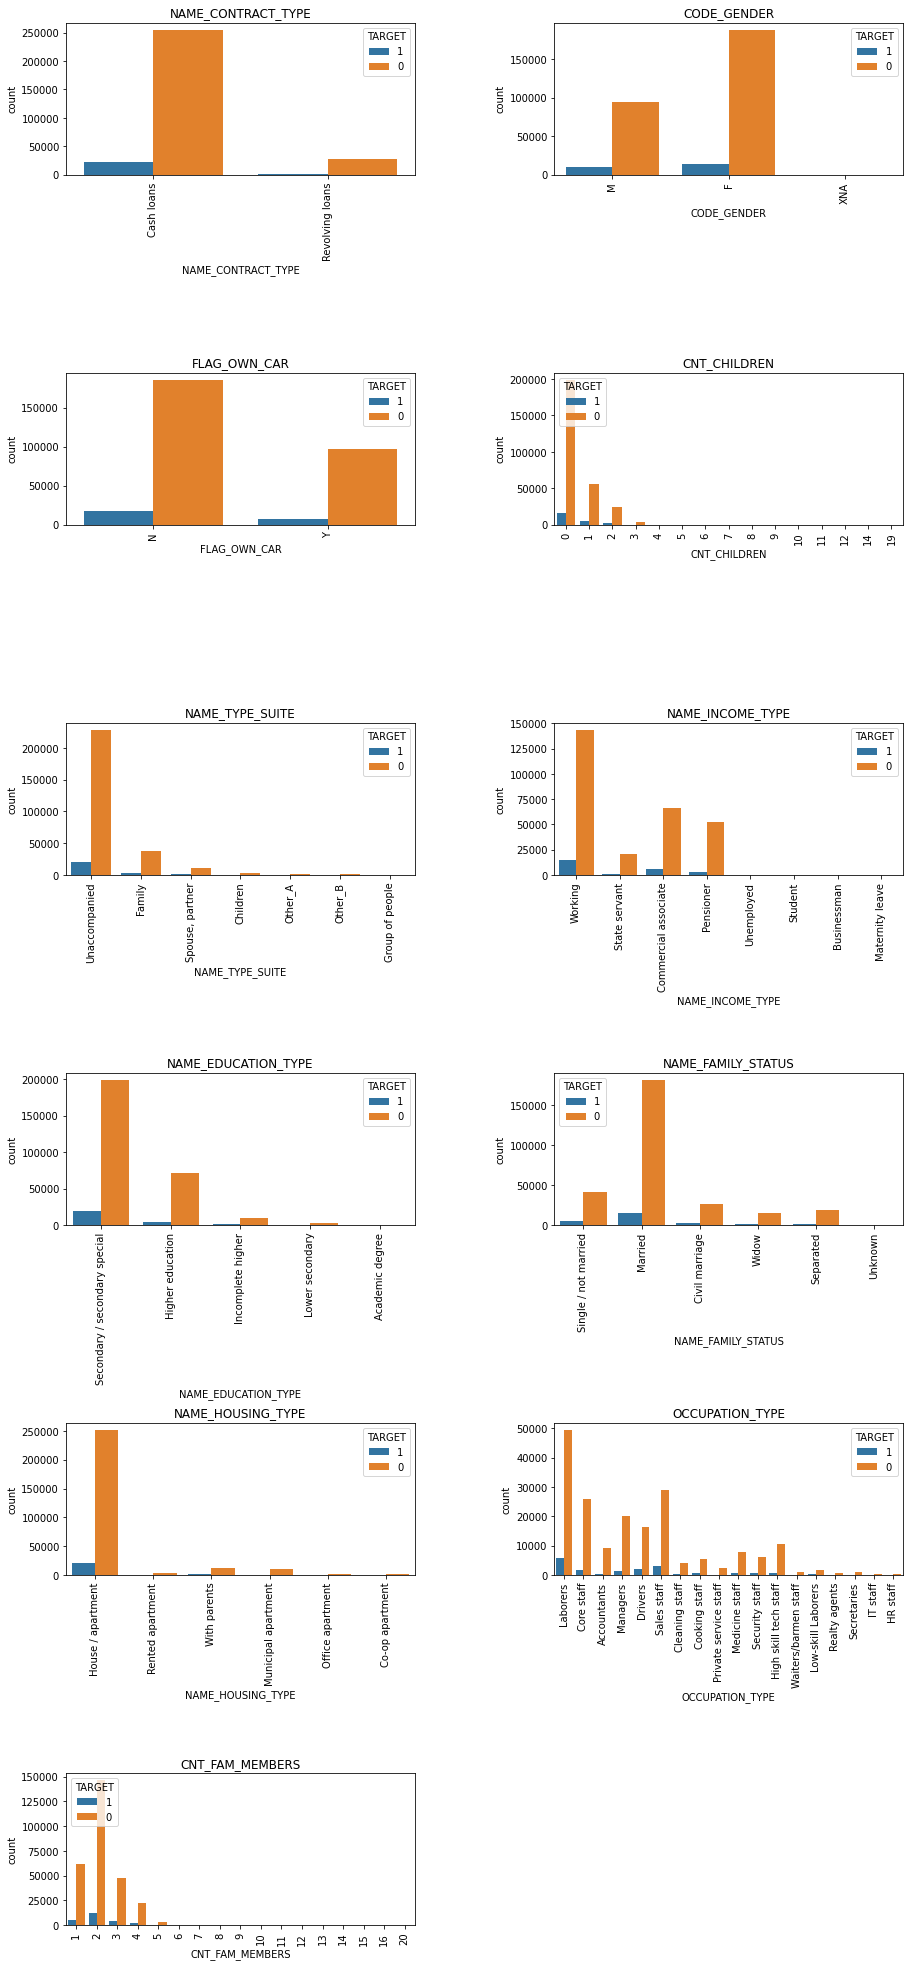

In [36]:
l2 = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS']
fig = plt.figure(figsize=(15,35))
fig.subplots_adjust(hspace=1.3, wspace=0.4)
for i in enumerate(l2):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(data=df_app,x=i[1],hue='TARGET').set(title=i[1])
    plt.xticks(rotation=90)

## Observations from above graphs

1. NAME_CONTRACT_TYPE
    -  Clients with Cash loans are more likely to pay the loan without any difficulties
2. CODE_GENDER
    -  Female application are more compared to Male because of low interest rates for females .
    -  Also looking at the numbers Females are more likely to default compared to Male.
3. FLAG_OWN_CAR
    -  Number of clients who does not own Car are more likely to default(almost more than 50%).However, if we see number of clients who does not default and its number contribution across client who does not own a car is less (less than 50%)compared to clients who own car.
    -  Hence,client who owns Car is less likely to default.
    -  It's better to give loan to applicants who owns a Car.
4. CNT_CHILDREN
    -  Clients with no children will pay loan on time and follows a negative trend if number of children increases.
5. NAME_TYPE_SUITE
    -  Clients come alone more often for loan application
6. NAME_INCOME_TYPE
    -  Most of the working people apply for the loan application
7. NAME_EDUCATION_TYPE
    -  It is more favourable to give loan who had Secondary or Higher education than with lower education.
8. NAME_FAMILY_STATUS
    -  Married clients tend to have less chance of becoming defaulters.
9. NAME_HOUSING_TYPE
    -  Clients living in House/Apartment are more likely to pay the loan on time.
10. OCCUPATION_TYPE
    -  Laborers, core staff, drivers and sales staff require loan mostly and these occupation people have less chance of becoming defaulters
11. CNT_FAM_MEMBERS
    -  Clients living with two persons most likely require loan and has more than 90% probability of paying loan without any difficulties.

### Continuous Variables

In [37]:
def univariate_analysis(df, col):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=col, orient='v').set(title='Box Plot')
    plt.yscale('log')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col].dropna()).set(title='Box Plot')
    plt.yscale('log')

#### INCOME AMOUNT OF THE CLIENT

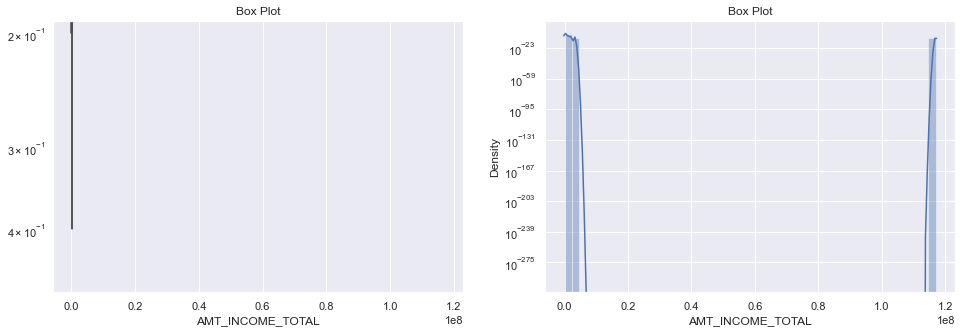

In [38]:
#Plotting for clients with defaults
univariate_analysis(df=df_target1,col='AMT_INCOME_TOTAL')

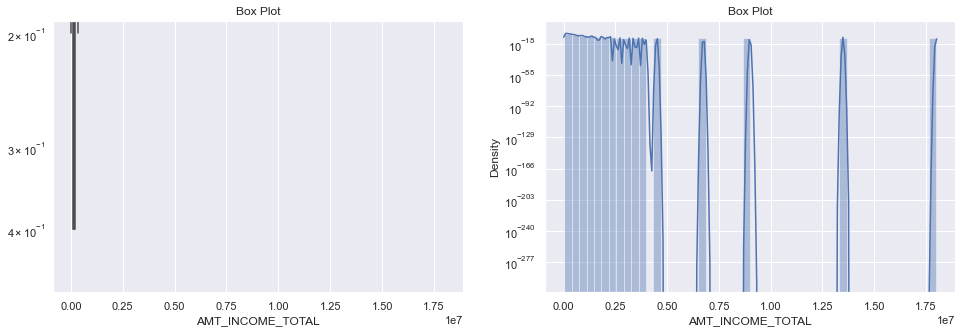

In [39]:
#Plotting for non-defaulter clients
univariate_analysis(df=df_target0,col='AMT_INCOME_TOTAL')

- Clients income is spread equally in both the target cases but from the box plots, one difference is that most of the non-defaulters clients have income more than the median income.
- This tells us that clients with income between 150000-200000 may be beneficial for getting non-defaulters clients
- Clients with income between 100000-150000 are most likely to become defaulters

#### CREDIT AMOUNT OF THE LOAN

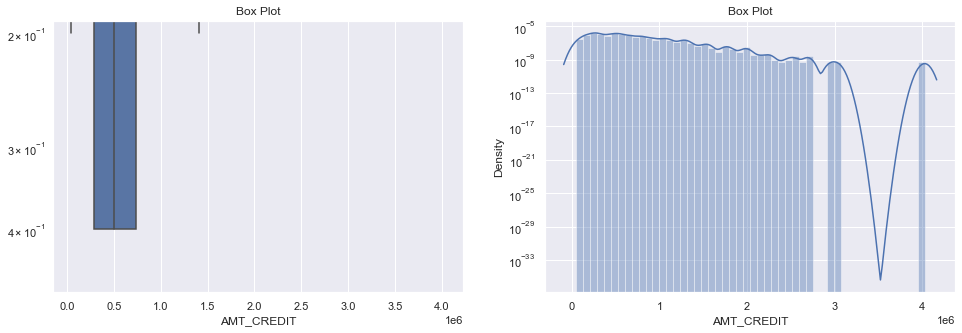

In [40]:
univariate_analysis(df=df_target1,col='AMT_CREDIT')

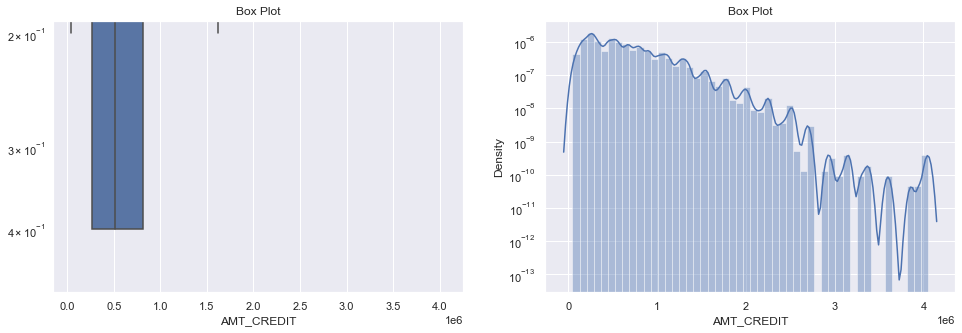

In [41]:
univariate_analysis(df=df_target0,col='AMT_CREDIT')

- Clients with loan credit between 250000-500000 have more chances to become defaulters

#### ANNUITY AMOUNT FOR THE CLIENT

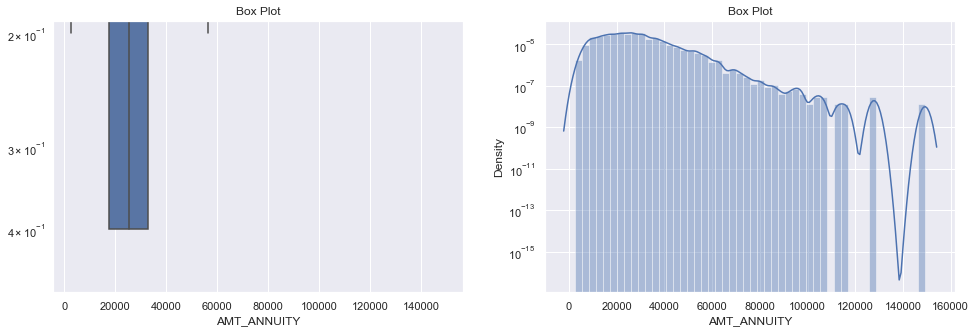

In [42]:
univariate_analysis(df=df_target1,col='AMT_ANNUITY')

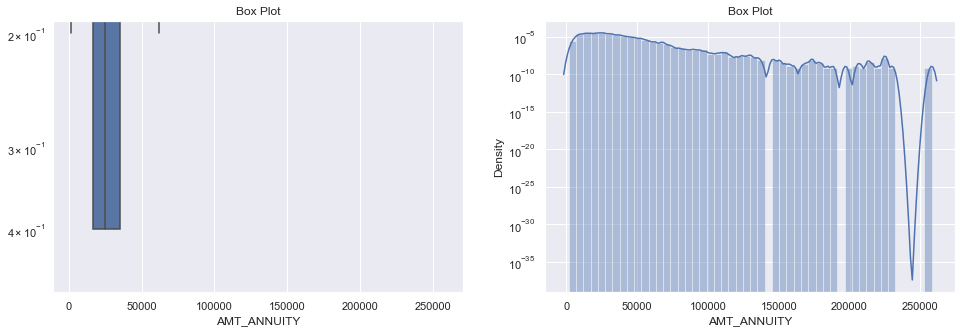

In [43]:
univariate_analysis(df=df_target0,col='AMT_ANNUITY')

- Annuity amount shows normally distributed pattern
- Mostly client gets 15000-30000 as annuity amount for the loan

#### GOODS PRICE FOR THE LOAN

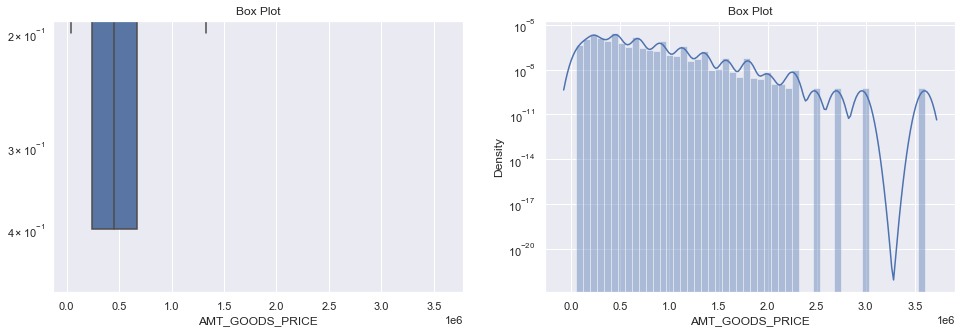

In [44]:
univariate_analysis(df=df_target1,col='AMT_GOODS_PRICE')

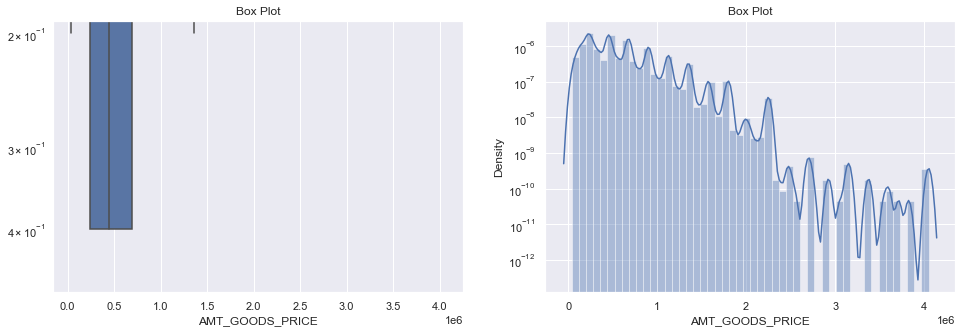

In [45]:
univariate_analysis(df=df_target0,col='AMT_GOODS_PRICE')

- Maximum defaulters lie betweeen goods price amount of 225000-425000
- There are specific amounts where clients have proven to be non-defaulters such as 200000,425000 and 650000. Clients with these goods price may belong to the same category and are non-defaulters

#### CLIENT'S AGE

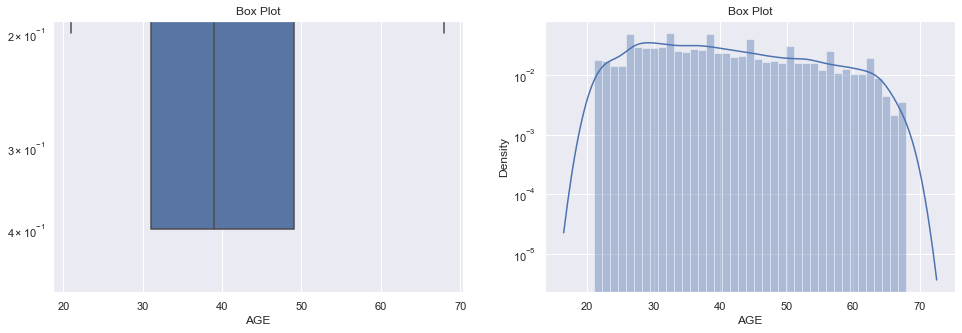

In [46]:
univariate_analysis(df=df_target1,col='AGE')

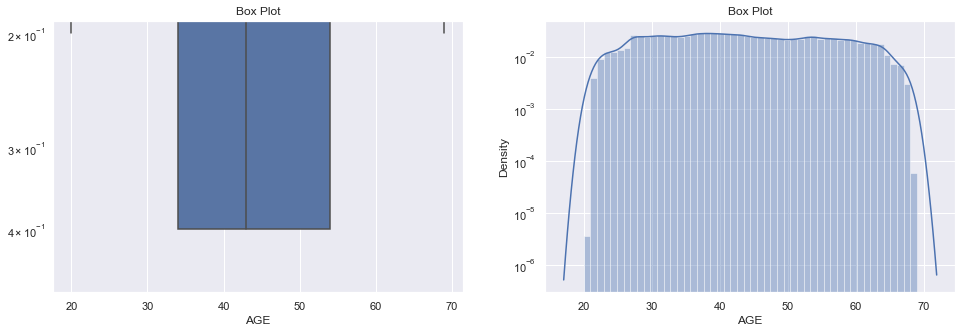

In [47]:
univariate_analysis(df=df_target0,col='AGE')

- Many clients with age 32 and 45 years are defaulters.
- Client's age show a normal trend such that clients with every age category requires loan.
- But clients with age between 30-40 can pay the loan without any difficulties.

#### CLIENT'S WORK EXPERIENCE

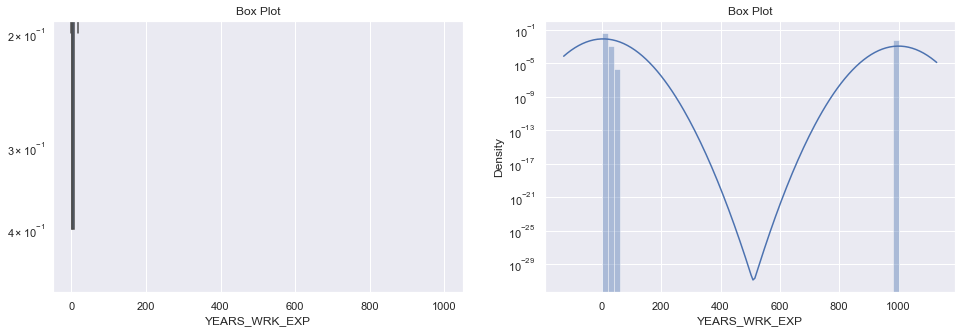

In [48]:
univariate_analysis(df=df_target1,col='YEARS_WRK_EXP')

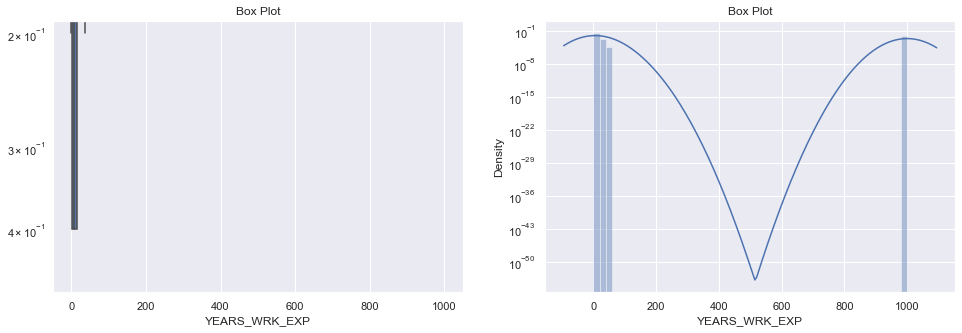

In [49]:
univariate_analysis(df=df_target0,col='YEARS_WRK_EXP')

- Most applications are from clients with 2 years of experience in both the cases
- Work experience has negative trend with the increase years of experience.
- Bank should focus more on clients with 2 years of experience to increase their business.

## Bivariate Analysis 

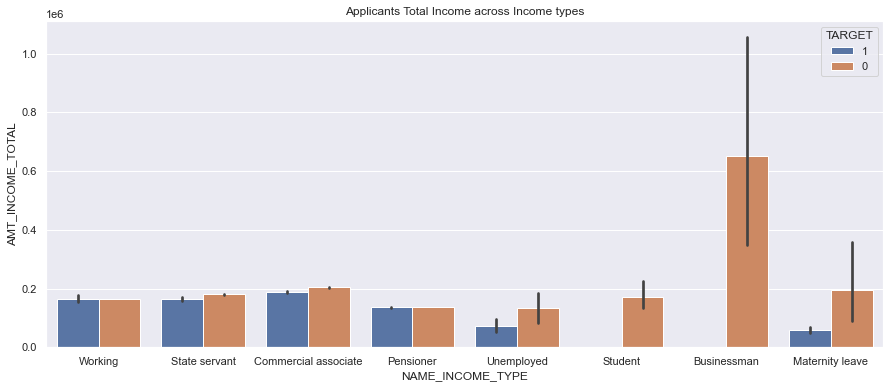

In [50]:
#1. Numerical vs Categorical

# AMT_INCOME_TOTAL vs AMT_INCOME_TYPE
# will see how is the Income for various category and its distribution across defaulters and non defaulters group

plt.figure(figsize=(15,6))
sns.barplot(data=df_app,x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title("Applicants Total Income across Income types")
plt.show()

From the above plot we can infer below points:
1. Students/Businessman are absolute non defaulters.<br>
2. Females who are on maternity leaves are less likely to default.<br>
3. For rest of the income type categories, bank should verify as there are chances of default as most of the defaulters are from working, state servant, commercial associats, Pensioner or Unemployed

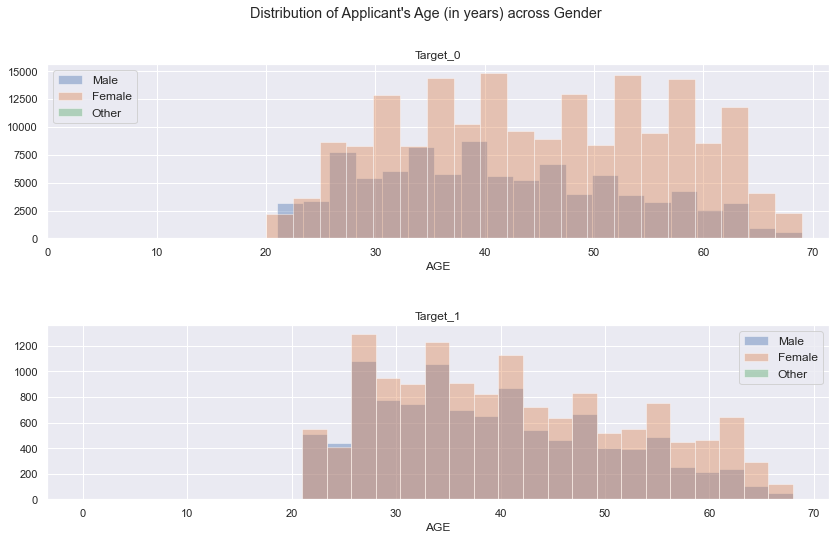

In [51]:
#2. Categorical vs Categorical

# AGE vs CODE_GENDER

#1. Distribution of Applicant's Age in years across Gender
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Distribution of Applicant's Age (in years) across Gender")

plt.subplot(2,1,1)

df = df_target0[df_target0.CODE_GENDER == "M"]
sns.distplot(df['AGE'],kde=False, label='Male',bins = 20)
df = df_target0[df_target0.CODE_GENDER == "F"]
sns.distplot(df['AGE'],kde=False, label='Female',bins = 20)
df = df_target0[df_target0.CODE_GENDER == "XNA"]
sns.distplot(df['AGE'],kde=False, label='Other',bins = 20)
plt.xticks(np.arange(0,80,10))
plt.gca().set_title("Target_0")
plt.legend(prop={'size': 12})

plt.subplot(2,1,2)

df = df_target1[df_target1.CODE_GENDER == "M"]
sns.distplot(df['AGE'],kde=False, label='Male',bins = 20)
df = df_target1[df_target1.CODE_GENDER == "F"]
sns.distplot(df['AGE'],kde=False, label='Female',bins = 20)
df = df_target1[df_target1.CODE_GENDER == "XNA"]
sns.distplot(df['AGE'],kde=False, label='Other',bins = 20)
plt.xticks(np.arange(0,80,10))
plt.gca().set_title("Target_1")
plt.legend(prop={'size': 12})

plt.show()

1. Clients in early 20s are likely to dont have payment difficulties,specially Females applicants.They are might be students(at the age of 21 or 22) just done with graduation and may have applied education loan for Masters.
2. Most number of defaults can be found under age group 25 to 40 yrs.

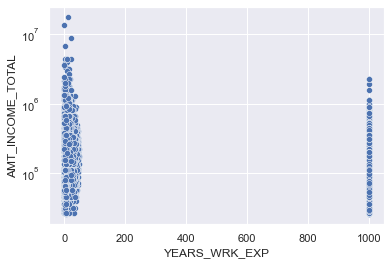

In [52]:
#3. Income vs work experience

#Target_0

sns.scatterplot(y = df_target0['AMT_INCOME_TOTAL'],x = df_target0['YEARS_WRK_EXP'])
plt.yscale('log')

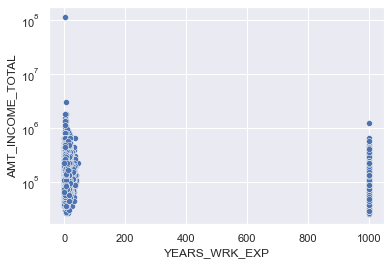

In [53]:
#Target_1
sns.scatterplot(y = df_target1['AMT_INCOME_TOTAL'],x = df_target1['YEARS_WRK_EXP'])
plt.yscale('log')

#### Points for Target = 1 graph compared to Target = 0
Less work experience and more the income are more likely to default

### Analysis for Previous Application Data

In [54]:
#load prev data file 

df_prev = pd.read_csv('../input/loanapplicationdata/previous_application.csv')
df_prev.shape

FileNotFoundError: [Errno 2] No such file or directory: '../input/loanapplicationdata/previous_application.csv'

In [ ]:
df_prev.describe()

In [ ]:
df_prev.head()

In [ ]:
# Select only relevent columns from previous application data
df_prev = df_prev[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY']]

In [ ]:
# change data type 
df_prev['SK_ID_CURR'] = df_prev['SK_ID_CURR'].astype('str')
df_prev['SK_ID_PREV'] = df_prev['SK_ID_PREV'].astype('str')
df_prev.dtypes

In [ ]:
#merge the current application and prev application data on column SK_ID_CURR

master_df = pd.merge(df_app, df_prev, on='SK_ID_CURR', how='left')
master_df.shape

In [ ]:
master_df.dtypes

In [ ]:
#Days decision should be positive, handle negative sign

master_df['DAYS_DECISION'] = abs(master_df['DAYS_DECISION'])

In [ ]:
#Divide master data (Current application and their information of previous applications) into Target 0 and 1
#1 = Applicants having payment difficulties in current application
#0 = other cases in current application

master_df_t1 = master_df[master_df['TARGET']== '1']
master_df_t0 = master_df[master_df['TARGET']== '0']

print(master_df_t1.shape)
print('\n')
print(master_df_t0.shape)

Note : Current applicants can have multiple previous application, hence many rows got associated with single current application and total number of rows in marster data after merging has incresed

### Univariate analysis

In [ ]:
#1. NAME_CONTRACT_STATUS 

# Overall % contribution of each previous application's status for rows associated with Target category 1 or 0
# Target 1(curr app have payment diffifulty) or 0 (other cases)

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
master_df_t0['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
master_df_t1['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Contract Status of Previous applications")
plt.show()

From above graph : % of refused previous application are more for Target = 1 (24.1%) compared to that of Target 0 (16.7%)
It looks like applicants with status of previous applications = Refused are more likely to have difficulties in payments.

In [ ]:
# 2. CODE_REJECT_REASON

temp1= master_df_t1[master_df_t1['NAME_CONTRACT_STATUS']=="Refused"]
temp0= master_df_t0[master_df_t0['NAME_CONTRACT_STATUS']=="Refused"]
def add_labels_per(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), fontsize=12, ha='center', va='bottom')
                
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
sns.countplot(x='CODE_REJECT_REASON',data = temp0)
add_labels_per(plt.gca())
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
sns.countplot(x='CODE_REJECT_REASON',data = temp1)
plt.suptitle("Distribution of overall Code Reject Reason of previous application",fontsize = 18)
add_labels_per(plt.gca())
plt.show()


It looks like previous application with rejection reason with SCOFR are more likely to have payment difficulties.Rest of the reasons distribution is not that significant .<br>

In [ ]:
#3. DAYS_DECISION

plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,2,1)
plt.gca().set_title("Target_0")
master_df_t0.DAYS_DECISION.value_counts().plot.hist()

plt.subplot(2,2,2)
plt.gca().set_title("Target_1")
master_df_t1.DAYS_DECISION.value_counts().plot.hist()
plt.suptitle("Distribution of number of days taken for decision of previous application",fontsize = 18)
plt.show()

1. Less the days for decision about previous application made,more likely to have payment difficulties.

In [ ]:
#AGE group for Previous applications in refused status

plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(2,2,1)
plt.gca().set_title("Target_0")
master_df_t0[master_df_t0['NAME_CONTRACT_STATUS']== "Refused"].AGE.plot.hist(bins = 30)

plt.subplot(2,2,2)
plt.gca().set_title("Target_1")
master_df_t1[master_df_t1['NAME_CONTRACT_STATUS']=="Refused"].AGE.plot.hist(bins = 30)
plt.suptitle("AGE group for Previous applications in refused status",fontsize = 18)
plt.show()

Number of refused applications who are having payment difficulties lies in the age group 25 to 40 and the frequncy decreasing as age increases.<br>
on the other hand,for group not having payment difficulties,diff in distribution of age group is not that significant.

In [ ]:
# NAME_GOODS_CATEGORY

plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_GOODS_CATEGORY',data = master_df_t0)
plt.xticks(rotation = 90,fontsize = 15)
add_labels_per(plt.gca())
plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_GOODS_CATEGORY',data = master_df_t1)
plt.xticks(rotation = 90,fontsize = 15)
add_labels_per(plt.gca())
plt.show()

No significance difference found for Goods category !

In [ ]:
#NAME_CLIENT_TYPE

plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
master_df_t0['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
master_df_t1['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.suptitle("Percentage Distribution of Client Type")
plt.show()

No significant difference for Client type ! 

In [ ]:
#NAME_PAYMENT_TYPE

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_PAYMENT_TYPE',data = master_df_t0)
plt.xticks(rotation = 45,fontsize = 15)
add_labels_per(plt.gca())
plt.subplot(1,2,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_PAYMENT_TYPE',data = master_df_t1)
plt.xticks(rotation = 45,fontsize = 15)
plt.suptitle("NAME_PAYMENT_TYPE for previous applications",fontsize = 18)
add_labels_per(plt.gca())
plt.show()

No significant difference found !

In [ ]:
# NAME_CASH_LOAN_PURPOSE

# % contribution of CASH_LOAN_PURPOSE (XNA excluded as around 80% rows are marked XNA)

plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=1.0, wspace=0.5)

plt.subplot(2,1,1)
plt.gca().set_title("Target_0")
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data = master_df_t0[(master_df_t0['NAME_CONTRACT_TYPE_y']=="Cash loans") & (master_df_t0['NAME_CASH_LOAN_PURPOSE']!="XNA")])
plt.xticks(rotation = 90,fontsize = 15)
plt.xlabel("")
add_labels_per(plt.gca())
plt.subplot(2,1,2)
plt.gca().set_title("Target_1")
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data = master_df_t1[(master_df_t1['NAME_CONTRACT_TYPE_y']=="Cash loans") & (master_df_t1['NAME_CASH_LOAN_PURPOSE']!="XNA")])
plt.xticks(rotation = 90,fontsize = 15)
plt.xlabel("NAME_CASH_LOAN_PURPOSE",fontsize = 15)
add_labels_per(plt.gca())
plt.suptitle("% Distribution per Cash Loan Purpose",fontsize = 20)
plt.show()

No significance difference between both sets.

#### Bivariate Analysis

In [ ]:
#Numerical vs Categorical

#Total income for across NAME_CONTRACT_STATUS

plt.figure(figsize = (10,6))
sns.barplot(y = "AMT_CREDIT_y",x  = 'NAME_CLIENT_TYPE' , data = master_df[(master_df['NAME_CONTRACT_TYPE_y']== "Cash loans") | (master_df['NAME_CONTRACT_TYPE_y']== "Revolving loans")],hue = 'TARGET')
#add_labels_per(plt.gca())
plt.title("Credit Amount of previous applications across Client Type",fontsize = 15)
plt.show()

Notes from above graph : 
1. Credit amount for Revolving loans and Cash loans are checked against client type for previous applications.<br>
2. There is no significant difference seen for Reapeater/Refreshed/New types.<br>

### Key Points :

The most influencing factors  from the both current and previous application data sets are as below :

1.Family Status  (Married clients tend to have less chance of becoming defaulters.)

2.Occupation type
(Laborers, core staff, drivers and sales staff require loan mostly and these occupation people have less chance of becoming defaulters)

3.Clients Total Income (less the income more likely to default).Also the respective Amount Credit/Goods Price/Annuity should be verified. For defaulters its inversely correlated.

4.Income type (Students/Businessman are absolute non defaulters.)

5.Age of Client (Trend from current as well as previous application shows age group from 32 to 45 yrs are likely to default)

6.Previous application contract status (24.1% previous application in refused status contribute in defaulters list)

7.Rejection reason for previous application should be checked to verify compliance check/blacklisted customer etc)

8.Number of days taken for decision of previous applications (Less the number of days , more likely to default)

9.Client type against credit amount should be verified.